**PROJECT TITLE: Insurance Premium Prediction**

**DOMAIN:** Insurance

**PROBLEM STATEMENT:**
The goal of this project is to give people an estimate of how much they need based on
their individual health situation. After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

**APPROACH:** The classical machine learning tasks like Data Exploration, Data Cleaning,
Feature Engineering, Model Building and Model Testing.

**RESULTS:** You have to build a solution that should able to predict the premium of the
personal for health insurance

In [138]:
# Importing data manipulation liabraries
import pandas as pd
import numpy as np

# Importing data visualization liabraries
import matplotlib.pyplot as plt
import seaborn as sns
from colorcet import cm_n
import matplotlib.cm as cm

# Importing stats liabraries
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Importing model building liabraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score

In [139]:
# Loading the dataset
df = pd.read_csv('C:/Users/user/Desktop/Projects/ineuron/Insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [140]:
# Checking shape
df.shape

(1338, 7)

In [141]:
# Checking for null values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [142]:
# Data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [143]:
# Checking for duplicate values
df.duplicated().sum()

1

In [144]:
# Droping duplicate values
df.drop_duplicates(inplace=True)

In [145]:
# Exploring numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


In [146]:
# Exploring categorical variables
df.describe(include='object').T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


# Observations
- The dataset contains 4 numerical features (age, bmi, children and expenses).
- 3 nominal features (sex, smoker and region) 
- No null values
- 1 duplicate row was present in the dataset. 
- Dataset contains 1337 observations (after droping duplicate row)(original rows = 1338) and 7 features (columns, including target variable). 

# Exploratory Data Analysis

# Univariate Analysis

#### Numerical variables

#### 1. Age

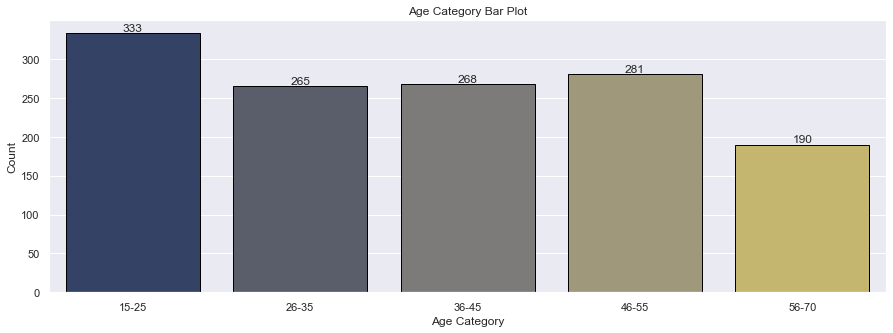

In [147]:
# Barplot for age column
sns.set(style="darkgrid")
age_data = df['age']
age_categories = ["15-25", "26-35","36-45", "46-55","56-70"]

# Create age category bins
bins = [15,26,36,46,56,71]

# Use pandas cut to categorize the ages
age_categories = pd.cut(age_data, bins, labels=age_categories)

# Count the occurrences of each age category
age_counts = age_categories.value_counts().sort_index()

# Create a bar plot with Seaborn
plt.figure(figsize=(15,5))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='cividis',edgecolor='black',linewidth=1)
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.title("Age Category Bar Plot")

# Printing count on top of bar 
for i, value in enumerate(age_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')
    

plt.show()

- A bar plot, also known as a bar chart, is a widely used data visualization tool in statistics and data analysis. It presents categorical data with rectangular bars of varying heights, where the length or height of each bar is proportional to the value it represents.
- Here, we are creating age groups to get the idea about maximum people belongs to which age group. 

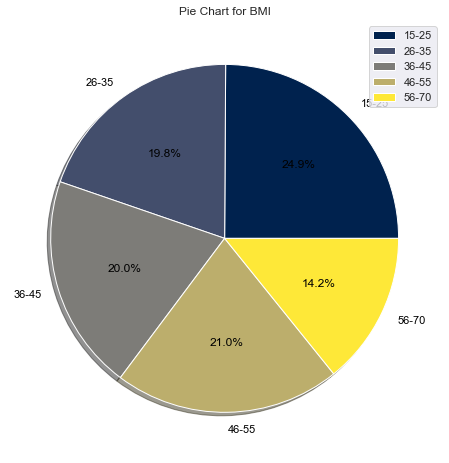

In [148]:
# Calculate percentages
total = age_counts.sum()
percentages = (age_counts / total) * 100

# Create a pie chart using Matplotlib
plt.figure(figsize=(15,8))
labels = [f"{value}" for value in (age_counts.index)]
colors = plt.cm.cividis(np.linspace(0, 1, len(labels)))
plt.pie(age_counts,labels=labels, autopct='%1.1f%%', colors=colors,shadow=True,textprops={'color': 'black'})
plt.title("Pie Chart for BMI")
plt.legend()
plt.show()

- A pie chart is a circular statistical graphic that is commonly used to represent data in a visually appealing and easy-to-understand manner.
- Pie charts are particularly useful for showing the composition of a whole and highlighting the distribution of categories within that whole. 

- Maximum population is from age group of (15-25) i.e 24%
- Minimum population is from age group of (56-70) i.e 14%

#### 2. BMI(Body Mass Index)

- Body Mass Index, commonly known as BMI, is a fundamental metric used to assess an individual's overall body weight in relation to their height. It is a simple yet valuable tool employed in healthcare, fitness, and public health to determine whether a person falls within a healthy weight range, is underweight, overweight, or obese.
- The unit of BMI (Body Mass Index) is typically expressed in kilograms per square meter (kg/m²). 

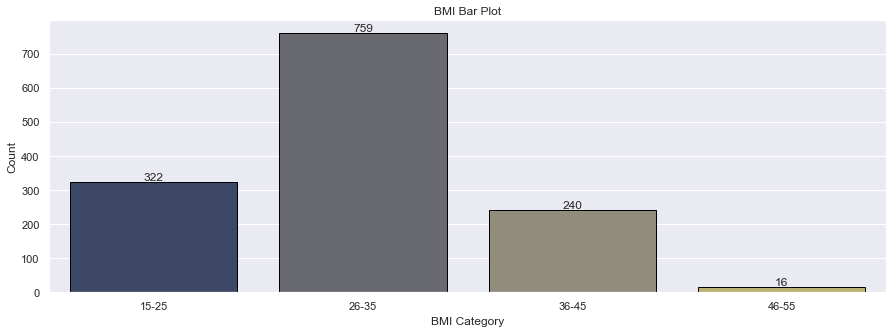

In [149]:
# Barplot for age column
sns.set(style="darkgrid")
bmi_data = df['bmi']
bmi_categories = ["15-25", "26-35","36-45", "46-55"]

# Create age category bins
bins = [15,26,36,46,56]

# Use pandas cut to categorize the ages
bmi_categories = pd.cut(bmi_data, bins, labels=bmi_categories)

# Count the occurrences of each age category
bmi_counts = bmi_categories.value_counts().sort_index()

# Create a bar plot with Seaborn
plt.figure(figsize=(15,5))
sns.barplot(x=bmi_counts.index, y=bmi_counts.values, palette='cividis',edgecolor='black',linewidth=1)
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.title("BMI Bar Plot")

# Printing count on top of bar 
for i, value in enumerate(bmi_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')
    
plt.show()

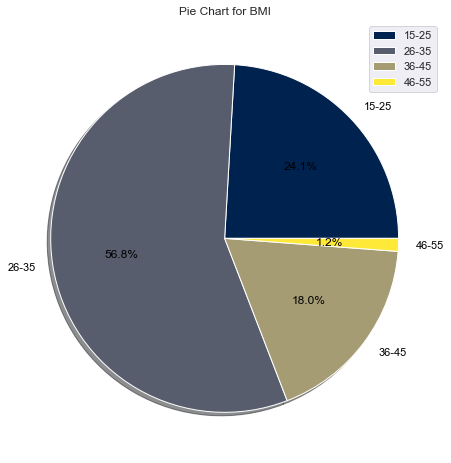

In [150]:
# Calculate percentages
total = bmi_counts.sum()
percentages = (bmi_counts / total) * 100

# Create a pie chart using Matplotlib
plt.figure(figsize=(15,8))
labels = [f"{value}" for value in (bmi_counts.index)]
colors = plt.cm.cividis(np.linspace(0, 1, len(labels)))
plt.pie(bmi_counts,labels=labels, autopct='%1.1f%%', colors=colors,shadow=True,textprops={'color': 'black'})
plt.title("Pie Chart for BMI")
plt.legend()
plt.show()

- Maximum population is from BMI range of (26-35) i.e 56%
- Minimum population is from BMI range of (46-55) i.e 1%

#### 3. Children

D:\D\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


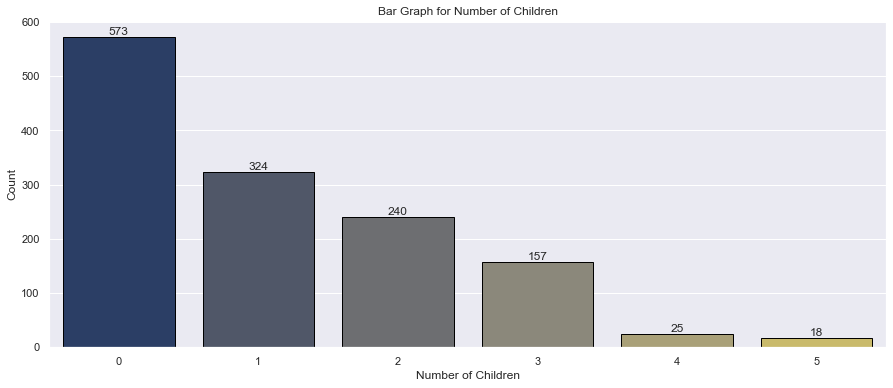

In [151]:
# Bar plot for children column
# Count the occurrences of each value from 1 to 5 in the "children" column
sns.set(style="darkgrid")
value_counts = df["children"].value_counts().sort_index()

# Extract the values and counts
values = value_counts.index
counts = value_counts.values

# Create a bar graph using Matplotlib
plt.figure(figsize=(15, 6))
sns.barplot(values, counts,palette='cividis',edgecolor='black',linewidth=1)

# Set labels and title
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.title("Bar Graph for Number of Children")
plt.xticks(values)  

# Printing count on top of bar 
for i, value in enumerate(value_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

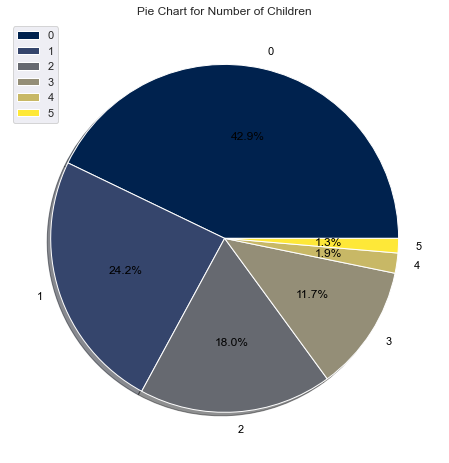

In [152]:
# Calculate percentages
total = value_counts.sum()
percentages = (value_counts / total) * 100

# Create a pie chart using Matplotlib
plt.figure(figsize=(15,8))
labels = [f"{value}" for value in (value_counts.index)]
colors = plt.cm.cividis(np.linspace(0, 1, len(labels)))
plt.pie(value_counts,labels=labels, autopct='%1.1f%%', colors=colors,shadow=True,textprops={'color': 'black'})
plt.title("Pie Chart for Number of Children")
plt.legend()
plt.show()

- Maximum population have 0 children. i.e 42% population

#### 4. Expenses

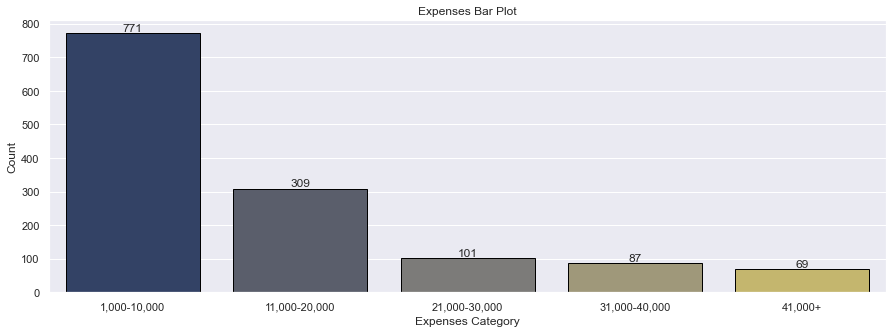

In [153]:
# Barplot for expenses column
sns.set(style="darkgrid")
exp_data = df['expenses']
exp_categories = ["1,000-10,000", "11,000-20,000","21,000-30,000","31,000-40,000","41,000+"]

# Create age category bins
bins = [1000,11000,21000,31000,41000,70000]

# Use pandas cut to categorize the ages
exp_categories = pd.cut(exp_data, bins, labels=exp_categories)

# Count the occurrences of each age category
exp_counts = exp_categories.value_counts().sort_index()

# Create a bar plot with Seaborn
plt.figure(figsize=(15,5))
sns.barplot(x=exp_counts.index, y=exp_counts.values, palette='cividis',edgecolor='black',linewidth=1)
plt.xlabel("Expenses Category")
plt.ylabel("Count")
plt.title("Expenses Bar Plot")

# Printing count on top of bar 
for i, value in enumerate(exp_counts):
    plt.text(i, value, str(value), ha='center', va='bottom')
    
plt.show()

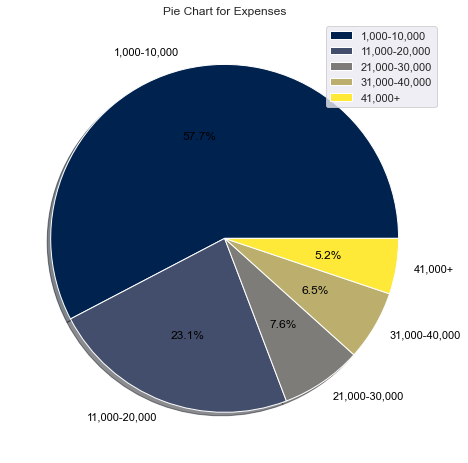

In [154]:
# Calculate percentages
total = exp_counts.sum()
percentages = (exp_counts / total) * 100

# Create a pie chart using Matplotlib
plt.figure(figsize=(15,8))
labels = [f"{value}" for value in (exp_counts.index)]
colors = plt.cm.cividis(np.linspace(0, 1, len(labels)))
plt.pie(exp_counts,labels=labels, autopct='%1.1f%%', colors=colors,shadow=True,textprops={'color': 'black'})
plt.title("Pie Chart for Expenses")
plt.legend()
plt.show()

- Maximum population have income between (1,000 to 10,000) i.e 57%

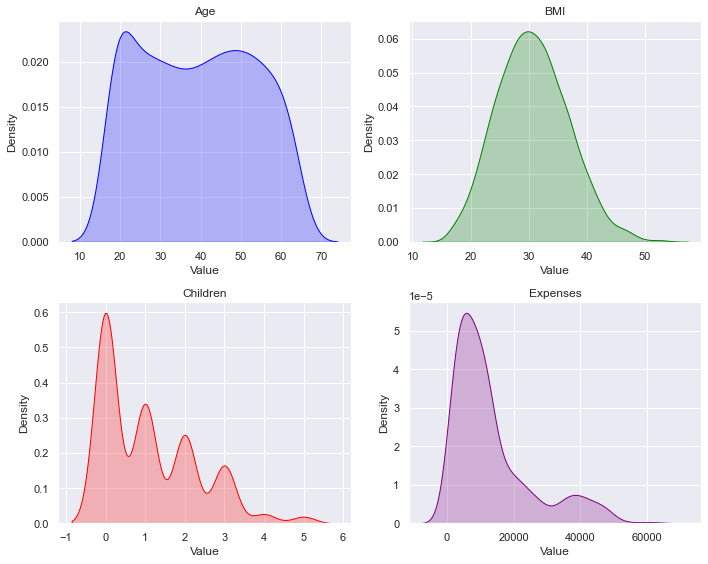

In [155]:
# Create subplots for each density curve
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot density curves for the specified columns
sns.kdeplot(df['age'], ax=axes[0, 0], label='Age', color='blue',shade=True)
sns.kdeplot(df['bmi'], ax=axes[0, 1], label='BMI', color='green',shade=True)
sns.kdeplot(df['children'], ax=axes[1, 0], label='Children', color='red',shade=True)
sns.kdeplot(df['expenses'], ax=axes[1, 1], label='Expenses', color='purple',shade=True)

# Add titles and labels
axes[0, 0].set_title("Age")
axes[0, 1].set_title("BMI")
axes[1, 0].set_title("Children")
axes[1, 1].set_title("Expenses")

for ax in axes.flat:
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

- The KDEplot, short for Kernel Density Estimate plot, allows us to visualize the distribution of data in a smooth and continuous manner. Unlike traditional histograms, KDEplots provide a non-discrete representation of data, offering a more refined view of the underlying data distribution.
- In this dataset BMI column is normaly distributed.
- Children and Expenses column both have skewed values.

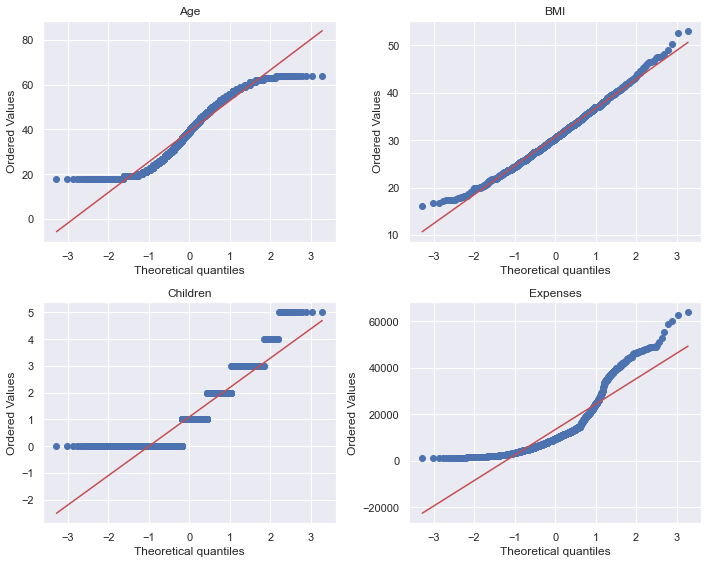

In [156]:
# QQ plot
# Create subplots for the probability plots
sns.set(style="darkgrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Create probability plots 
stats.probplot(df['age'], dist=stats.norm, plot=axes[0, 0])
axes[0, 0].set_title('Age')

stats.probplot(df['bmi'], dist=stats.norm, plot=axes[0, 1])
axes[0, 1].set_title('BMI')

stats.probplot(df['children'], dist=stats.norm, plot=axes[1, 0])
axes[1, 0].set_title('Children')

stats.probplot(df['expenses'], dist=stats.norm, plot=axes[1, 1])
axes[1, 1].set_title('Expenses')

plt.tight_layout()
plt.show()

- A QQ plot, short for Quantile-Quantile plot, is a valuable graphical tool in statistics and data analysis used to assess whether a dataset follows a specific theoretical distribution.

#### Categorical Variables

#### 1. Sex

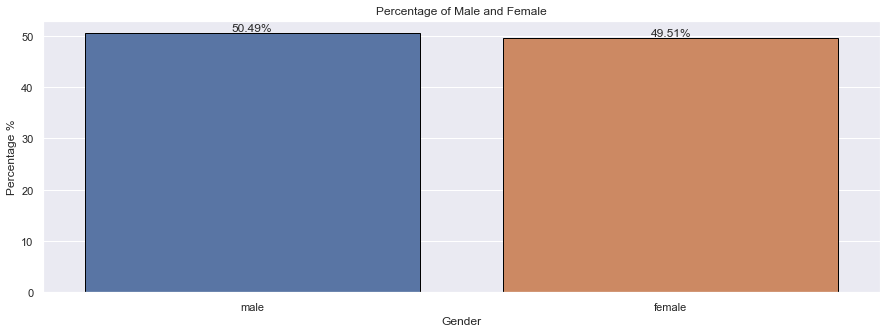

In [157]:
# Calculate the percentage of males and females
sns.set(style="darkgrid")
sex_counts = df["sex"].value_counts()
total = len(df)
percentage = (sex_counts / total) * 100

# Create a bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=percentage.index, y=percentage.values,palette='deep',edgecolor='black',linewidth=1)
plt.xlabel('Gender')
plt.ylabel('Percentage %')
plt.title("Percentage of Male and Female")

# Annotate the percentages on the bars
for i, p in enumerate(percentage):
    plt.text(i, p, f"{p:.2f}%", ha="center", va="bottom")

plt.show()

- Population have approx same male and female.
- Male = 50 % , Female = 49 %

#### 2. Smoker

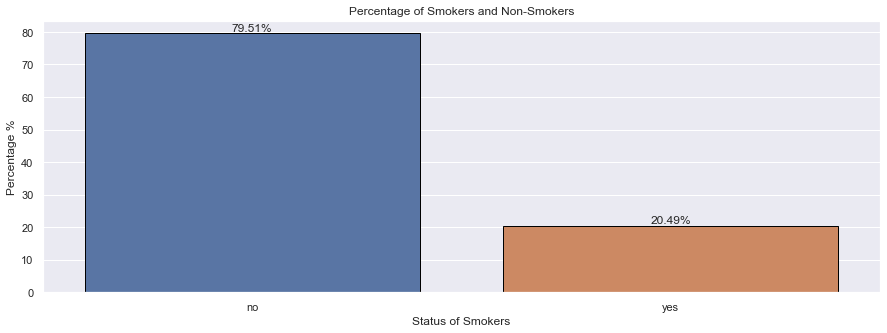

In [158]:
# Calculate the percentage of smokers and non smokers
sns.set(style="darkgrid")
smoker_counts = df["smoker"].value_counts()
total = len(df)
percentage = (smoker_counts / total) * 100

# Create a bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=percentage.index, y=percentage.values,palette='deep',edgecolor='black',linewidth=1)
plt.xlabel('Status of Smokers')
plt.ylabel('Percentage %')
plt.title("Percentage of Smokers and Non-Smokers")

# Annotate the percentages on the bars
for i, p in enumerate(percentage):
    plt.text(i, p, f"{p:.2f}%", ha="center", va="bottom")

plt.show()

- Smokers = 20 %
- Non-Smokers = 79 %

#### 3. Region

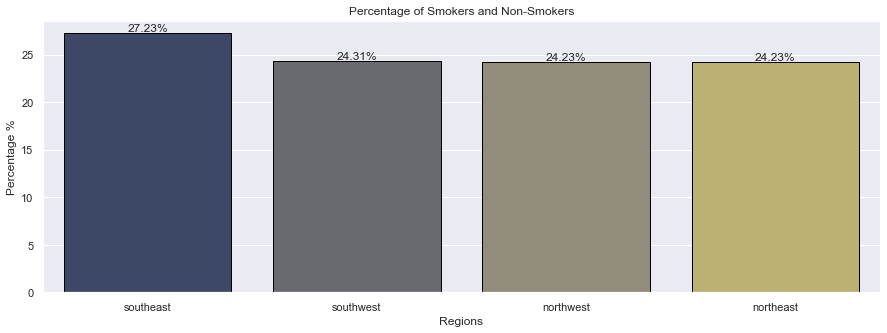

In [159]:
# Calculate the percentage of smokers and non smokers
sns.set(style="darkgrid")
region_counts = df["region"].value_counts()
total = len(df)
percentage = (region_counts / total) * 100

# Create a bar plot
plt.figure(figsize=(15, 5))
sns.barplot(x=percentage.index, y=percentage.values,palette='cividis',edgecolor='black',linewidth=1)
plt.xlabel('Regions')
plt.ylabel('Percentage %')
plt.title("Percentage of Smokers and Non-Smokers")

# Annotate the percentages on the bars
for i, p in enumerate(percentage):
    plt.text(i, p, f"{p:.2f}%", ha="center", va="bottom")

plt.show()

# Multi-variate Analysis

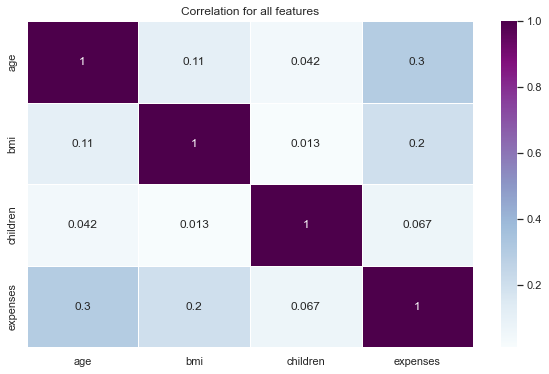

In [160]:
# Correlation 
correlation_matrix = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True, cmap= 'BuPu', linewidth=0.5)
plt.title('Correlation for all features')
plt.show()

- Correlation is a fundamental statistical concept that plays a crucial role in understanding the relationships between variables. It quantifies the degree to which two or more variables are associated or move together in a systematic way. 

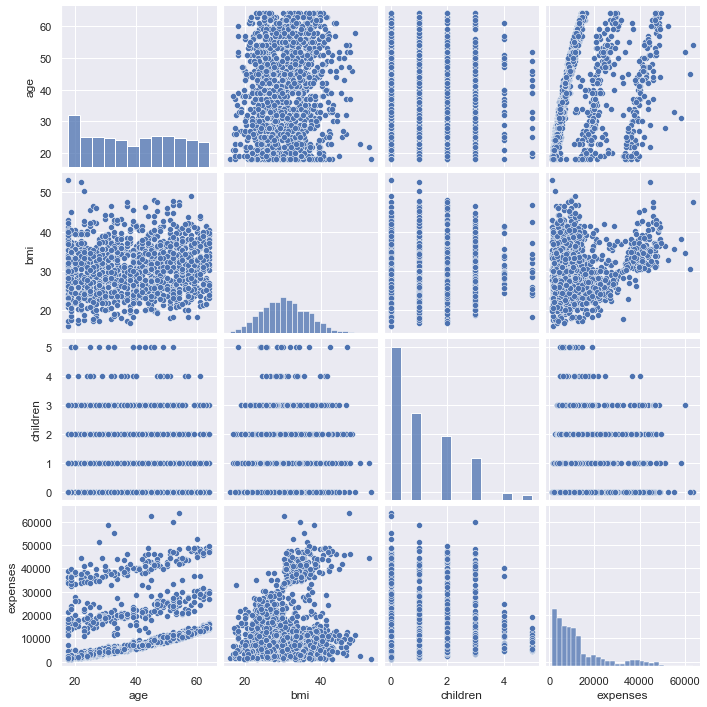

In [161]:
# Pairplot
sns.set(style="darkgrid")
sns.pairplot(df)
plt.show()

#### Age and Expenses

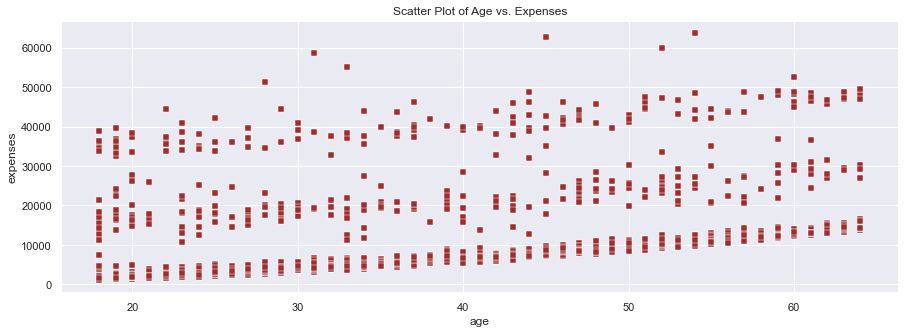

In [162]:
# Create a scatter plot for age vs. expenses
sns.set(style="darkgrid")
plt.figure(figsize=(15, 5))
sns.scatterplot(x=df["age"], y=df["expenses"],color='brown',marker='s')
plt.title("Scatter Plot of Age vs. Expenses")

plt.show()

- A scatter plot is a fundamental data visualization tool used to display the relationship between two variables. It's particularly valuable for understanding how changes in one variable are associated with changes in another. Scatter plots reveal patterns, trends, clusters, or outliers within a dataset and provide valuable insights into the nature of the relationship between the variables.

- As age is increasing, there is slight increase in the expenses

#### Age and Smokers

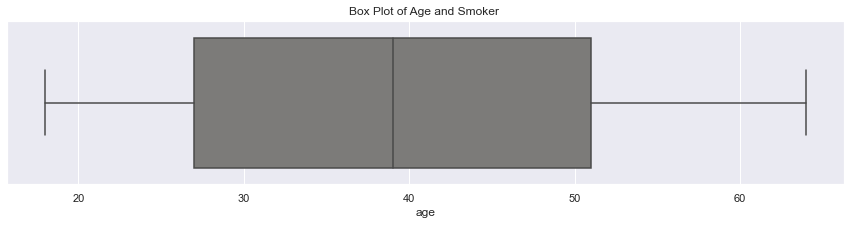

In [163]:
# Create a box plot of age by smoker status
sns.set(style="darkgrid")
plt.figure(figsize=(15, 3))
smokers_data = df[df["smoker"] == "yes"]
sns.boxplot( x=df["age"],data=smokers_data,palette='cividis')
plt.title("Box Plot of Age and Smoker ")
plt.show()

- A box plot, also known as a box-and-whisker plot, is a powerful data visualization tool designed to provide a concise summary of the distribution and central tendencies of a dataset. This graphical representation divides data into quartiles, displaying the median, upper and lower quartiles, and potential outliers. 

- Age group of smoker is 25 to 55(approx)

#### Age and BMI

C:\Users\user\AppData\Local\Temp\ipykernel_8980\1808005616.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Counts')


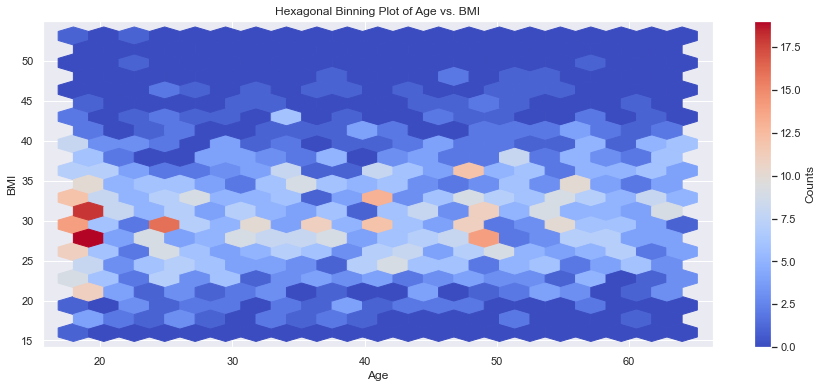

In [164]:
# Create a hexagonal binning plot for age vs. bmi
# Extract age and bmi columns
age = df["age"]
bmi = df["bmi"]

# Create a hexagonal binning plot for age and bmi
plt.figure(figsize=(15, 6))
plt.hexbin(age, bmi, gridsize=20, cmap='coolwarm')
plt.colorbar(label='Counts')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Hexagonal Binning Plot of Age vs. BMI')
plt.show()

-  hexbin plot is a unique and visually informative data visualization technique used to represent the distribution and density of points in a two-dimensional space. 
-  Hexbin plots divide the data space into hexagonal bins and count the number of data points within each bin. The result is a map of data density, where color intensity or shading in each hexagon reflects the concentration of points. 

#### Sex and Smoker 

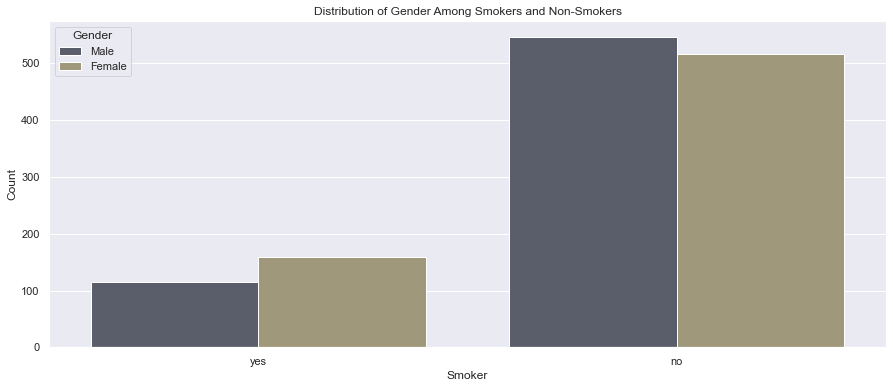

In [165]:
# Create a countplot to visualize gender distribution among smokers and non-smokers
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.countplot(x=df["smoker"], hue=df["sex"],palette='cividis')
plt.title("Distribution of Gender Among Smokers and Non-Smokers")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.legend(title="Gender", labels=["Male", "Female"])

plt.show()

- Female smoker are more than male.

#### Region and Expenses

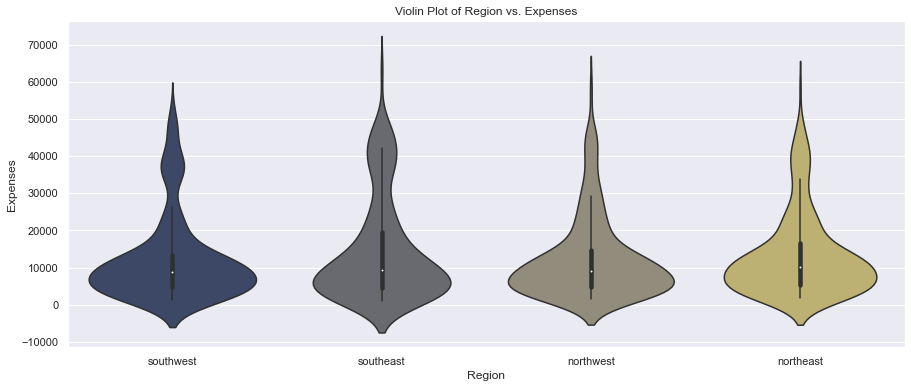

In [166]:
# Create a violin plot for age and expenses
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
custom_palette = ["#8B4513", "#A0522D", "#D2691E", "#CD853F"]
sns.violinplot(x=df["region"], y=df["expenses"],palette='cividis')
plt.title("Violin Plot of Region vs. Expenses")
plt.xlabel("Region")
plt.ylabel("Expenses")
plt.show()

- A violin plot is a versatile and engaging data visualization tool that combines aspects of both box plots and kernel density plots.
- A violin plot consists of a mirrored pair of kernel density plots, one for each side of a central box plot. This design allows us to simultaneously assess the summary statistics (such as median, quartiles) and the probability density of the data, which reveals insights into the data's shape and spread. Violin plots are particularly useful for comparing data distributions between multiple groups or categories, making them an essential tool for exploratory data analysis and data-driven decision-making.

- People in Southeast region have high expenses than people in other regions.
- Average expenses in all regions are between 1,000 to 20,000.

#### Smoker and Expenses

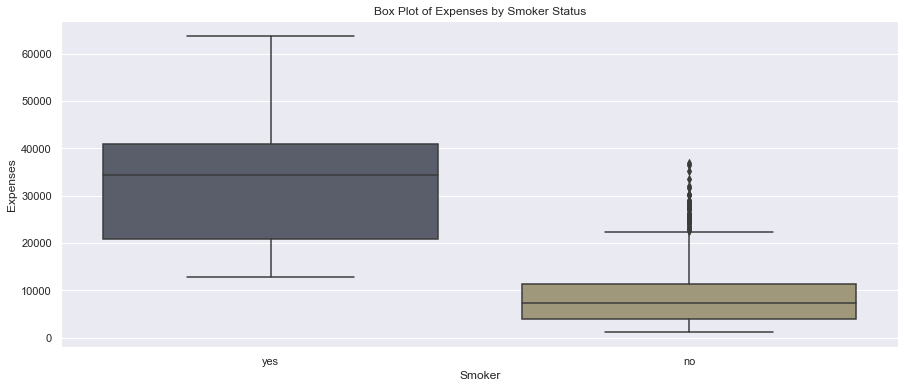

In [167]:
# Create a boxplot for expenses by smoker status
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.boxplot(x=df['smoker'], y=df['expenses'],palette='cividis')
plt.title("Box Plot of Expenses by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Expenses")
plt.show()

- Smokers have high expenses as compare to non-smokers.

#### Children and Expenses

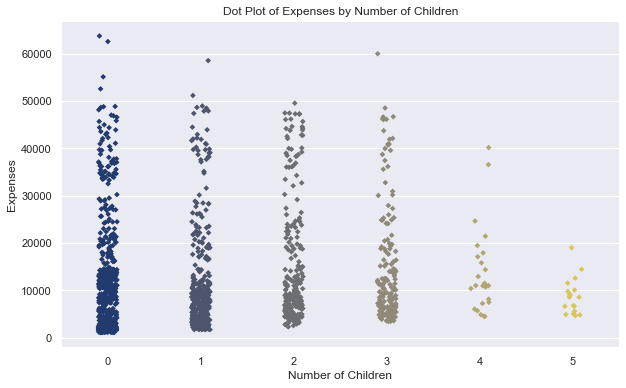

In [168]:
# Create a dot plot for expenses by the number of children
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.stripplot(x=df["children"], y=df["expenses"], jitter=True, palette="cividis", marker='D', size=4)
plt.title("Dot Plot of Expenses by Number of Children")
plt.xlabel("Number of Children")
plt.ylabel("Expenses")
plt.show()

- A strip plot, also known as a one-dimensional scatter plot, is a simple yet effective data visualization technique used to display individual data points along a single axis. It's particularly valuable for visualizing the distribution and density of data points within different categories or groups.

#### BMI and Expenses

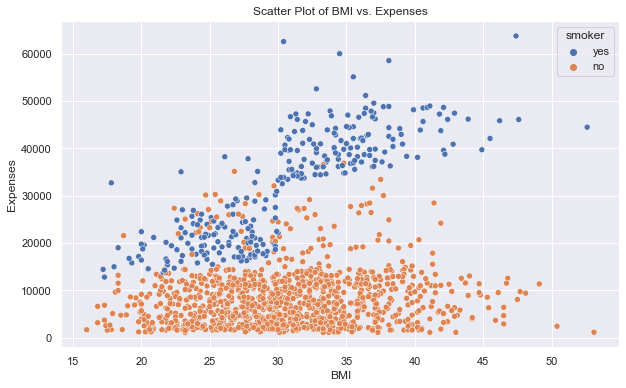

In [169]:
# Create a scatter plot for BMI vs. expenses
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="bmi", y="expenses", data=df, hue="smoker")
plt.title("Scatter Plot of BMI vs. Expenses")
plt.xlabel("BMI")
plt.ylabel("Expenses")
plt.show()

#### Region and Sex

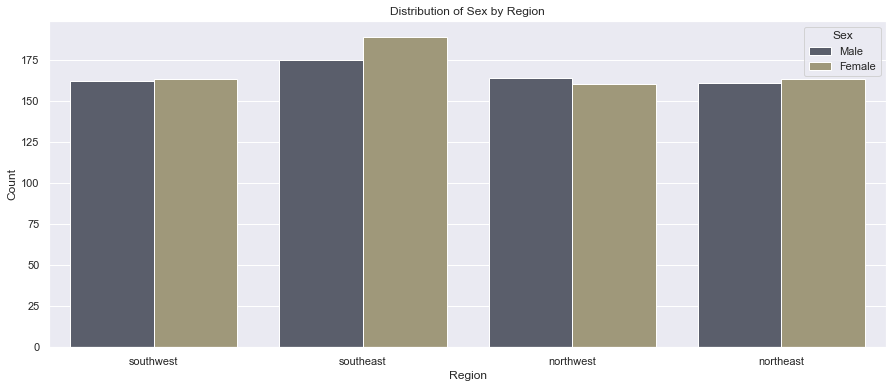

In [170]:
# Create a countplot to visualize the distribution of sex by region
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.countplot(x="region", hue="sex", data=df, palette="cividis")
plt.title("Distribution of Sex by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Sex", labels=["Male", "Female"])
plt.show()

- All regions have almost equal distribution of male and female.(except- southeast)
- Southeast region has high no. of females.

#### Region and Smokers

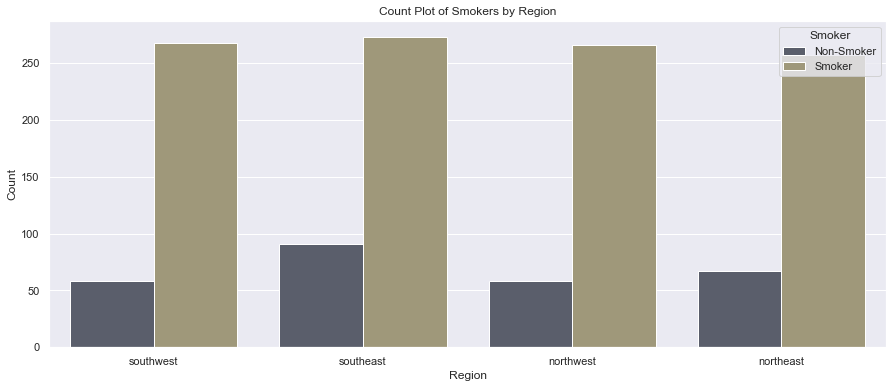

In [171]:
# Group the data by "region" and "smoker" and count the occurrences
# Create a count plot
sns.set(style="darkgrid")
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="region", hue="smoker", palette="cividis")

# Customize the plot
plt.title("Count Plot of Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Smoker", labels=["Non-Smoker", "Smoker"])

# Show the plot
plt.show()

- In the southeast region, there are highest no. of smokers.
- In the remaing regions aprrox equal no. of smokers.

# Preparing data for model building

In [172]:
# Replacing categorical values in smoker column with numerical values
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})

- Before training the data, converting categorical values to neumeric values. Here, in the smoker column replacing the 'yes' with '1' and 'no' with '0'.

In [173]:
# Replacing categorical values in sex column with numerical values
df['sex'] = df['sex'].replace({'female': 1, 'male': 0})

- In the sex column, replacing 'female' with '1' and 'male' with '0'.

In [174]:
# Applying one hot encoding on Region column
final_df = pd.get_dummies(df, columns=["region"], prefix=["region"])

- One-hot encoding is a technique used in data preprocessing, particularly in the context of machine learning and data analysis, to handle categorical data. Categorical data consists of categories or labels that don't have a natural order or numerical value associated with them. 
- Many machine learning algorithms, like regression and support vector machines, are based on mathematical equations. These algorithms require numerical input data. By one-hot encoding categorical variables, you transform them into a numerical format, making them suitable for these algorithms.

#### Scaling the data

In [175]:
# Select the numeric columns to scale
numeric_columns = final_df[['age','sex','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(numeric_columns)

# Create a new DataFrame with the scaled data and original column names
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns.columns, index=df.index)
df[numeric_columns.columns] = scaled_df

In [176]:
scaled_df

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,1.009771,-0.453484,-0.909234,1.969660,-0.565546,-0.565546,-0.611638,1.764609
1,-1.511647,-0.990324,0.513986,-0.079442,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
2,-0.799350,-0.990324,0.382803,1.580143,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
3,-0.443201,-0.990324,-1.306169,-0.909234,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
4,-0.514431,-0.990324,-0.289506,-0.909234,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
...,...,...,...,...,...,...,...,...,...
1333,0.767704,-0.990324,0.054847,1.580143,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
1334,-1.511647,1.009771,0.202427,-0.909234,-0.507702,1.768203,-0.565546,-0.611638,-0.566698
1335,-1.511647,1.009771,1.022317,-0.909234,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
1336,-1.297958,1.009771,-0.797838,-0.909234,-0.507702,-0.565546,-0.565546,-0.611638,1.764609


- Features in a dataset often have different scales and units. For example, one feature may range from 0 to 1, while another may range from 0 to 1000. Without scaling, features with larger scales can dominate the learning process and adversely affect the performance of certain machine learning algorithms. Scaling ensures that all features have a similar influence on the model, preventing one feature from overshadowing others.
- Scaling is crucial for distance-based algorithms, like K-means clustering or hierarchical clustering, where the distances between data points are calculated. Without scaling, features with larger scales can disproportionately impact the clustering results.

# Model Building

In [177]:
# Assigning input variables and target variable
x = scaled_df[['age','sex','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']]

y = df['expenses']

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#### 1. Random Forest Regressor Model

In [179]:
# Assigning input variables and target variable
x = scaled_df[['age','sex','bmi','children','smoker','region_northeast','region_northwest','region_southeast','region_southwest']]

y = df['expenses']

In [180]:
# Separate dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Training the model
model = RandomForestRegressor()
model.fit(x_train,y_train)

# Prediction
y_pred = model.predict(x_test)

In [181]:
# Performance Metrics
print('Mean Squared Error is: ', mean_squared_error(y_test,y_pred))
print('Mean Absolute Error is: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Adjusted score is: {} %'.format(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))) 

Mean Squared Error is:  23512658.81639491
Mean Absolute Error is:  2615.0136057213936
Root Mean Squared Error is:  4848.985338851306
R2 Adjusted score is: 88.67885459183672 %


#### 2.Linear Regression

In [182]:
# Separate dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Training the model
model_1 = LinearRegression()
model_1.fit(x_train,y_train)

# Prediction
y_pred = model_1.predict(x_test)

In [183]:
# Performance Metrics
print('Mean Squared Error is: ', mean_squared_error(y_test,y_pred))
print('Mean Absolute Error is: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Adjusted score is: {} %'.format(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))) 

Mean Squared Error is:  39016681.16598869
Mean Absolute Error is:  4187.037011466731
Root Mean Squared Error is:  6246.333417773078
R2 Adjusted score is: 88.67885459183672 %


#### 3. Decision Tree Regressor

In [184]:
# Separate dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Training the model
model_2 = DecisionTreeRegressor()
model_2.fit(x_train,y_train)

# Prediction
y_pred = model_2.predict(x_test)

In [185]:
# Performance Metrics
print('Mean Squared Error is: ', mean_squared_error(y_test,y_pred))
print('Mean Absolute Error is: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Adjusted score is: {} %'.format(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))) 

Mean Squared Error is:  37005881.596169405
Mean Absolute Error is:  2793.743208955224
Root Mean Squared Error is:  6083.245975313624
R2 Adjusted score is: 88.67885459183672 %


#### 4. K-Neighbors Regressor

In [186]:
# Separate dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Training the model
model_3 = KNeighborsRegressor()
model_3.fit(x_train,y_train)

# Prediction
y_pred = model_3.predict(x_test)

In [187]:
# Performance Metrics
print('Mean Squared Error is: ', mean_squared_error(y_test,y_pred))
print('Mean Absolute Error is: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Adjusted score is: {} %'.format(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))) 

Mean Squared Error is:  32791371.558064684
Mean Absolute Error is:  3534.5675870646764
Root Mean Squared Error is:  5726.375080106496
R2 Adjusted score is: 88.67885459183672 %


#### 5. SVR

In [188]:
# Separate dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Training the model
model_4 = SVR()
model_4.fit(x_train,y_train)

# Prediction
y_pred = model_4.predict(x_test)

In [189]:
# Performance Metrics
print('Mean Squared Error is: ', mean_squared_error(y_test,y_pred))
print('Mean Absolute Error is: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Adjusted score is: {} %'.format(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))) 

Mean Squared Error is:  191458922.88824502
Mean Absolute Error is:  8809.551933603827
Root Mean Squared Error is:  13836.868247123155
R2 Adjusted score is: 88.67885459183672 %


#### 6. Adaboost Regressor

In [190]:
# Separate dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Training the model
model_5 = AdaBoostRegressor()
model_5.fit(x_train,y_train)

# Prediction
y_pred = model_5.predict(x_test)

In [191]:
# Performance Metrics
print('Mean Squared Error is: ', mean_squared_error(y_test,y_pred))
print('Mean Absolute Error is: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Adjusted score is: {} %'.format(1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))) 

Mean Squared Error is:  26707909.93854205
Mean Absolute Error is:  3921.7291966258776
Root Mean Squared Error is:  5167.969614707699
R2 Adjusted score is: 88.67885459183672 %
